<a href="https://colab.research.google.com/github/adityacd/Churn-Prediction-using-Machine-Learning/blob/master/Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#Import Dataset
df = pd.read_csv('raw-customer-churn-data (1).csv')
df.head() 

,Name,Gender,Age,Payment Method,Churn,LastTransaction
0,Nicolas Garrett,male,64.0,credit card,loyal,98
1,Isaac Reyes,male,35.0,cheque,churn,118
2,Jaime Sullivan,female,25.0,credit card,loyal,107
3,Geraldine Miller,female,39.0,credit card,NaN,177
4,Curtis Frazier,male,39.0,credit card,loyal,90


In [4]:
#Finding count of Missing values
df.isna().sum()

Name                0
Gender              1
Age                 1
Payment Method      0
Churn              96
LastTransaction     0
dtype: int64

In [5]:
#Taking care of missing data
df['Gender'] = df['Gender'].fillna(method = 'ffill')
df['Age'] = df['Age'].fillna(method = 'ffill')
df['Churn'] = df['Churn'].fillna(method = 'ffill')

In [8]:
df.isnull().sum()

Name               0
Gender             0
Age                0
Payment Method     0
Churn              0
LastTransaction    0
dtype: int64

In [54]:
df['Churn'].value_counts()

1    639
0    360
Name: Churn, dtype: int64

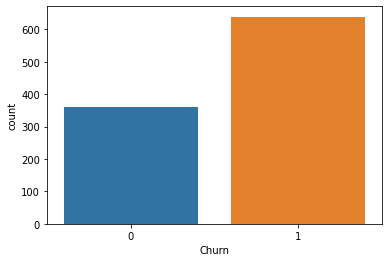

In [58]:
#Count of Churn and Loyal
sns.countplot(df['Churn'], label = 'count')

In [64]:
#Identifying the DataTypes
df.dtypes

Name                object
Gender               int64
Age                float64
Payment Method       int64
Churn                int64
LastTransaction      int64
dtype: object

In [9]:
#Encoding the Categorical varaibles independent variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])
df['Payment Method'] = le.fit_transform(df['Payment Method'])
df['Gender'] = le.fit_transform(df['Gender'])

In [66]:
df.head(20)

,Name,Gender,Age,Payment Method,Churn,LastTransaction
0,Nicolas Garrett,1,64.0,2,1,98
1,Isaac Reyes,1,35.0,1,0,118
2,Jaime Sullivan,0,25.0,2,1,107
3,Geraldine Miller,0,39.0,2,1,177
4,Curtis Frazier,1,39.0,2,1,90
5,Jeannie Palmer,0,28.0,1,0,189
6,Phyllis Romero,0,21.0,2,1,102
7,Maxine Edwards,0,21.0,1,1,111
8,Marty Cohen,0,32.0,1,0,50
9,Lionel Mendoza,1,48.0,2,1,141


In [11]:
#Spliting the Dataset into Dependent and Independent Variables
X = df.iloc[:,1:6]
y = df.iloc[:,4]

In [13]:
print(y)

0      1
1      0
2      1
3      1
4      1
      ..
994    1
995    1
996    1
997    1
998    1
Name: Churn, Length: 999, dtype: int64


In [14]:
X = X.drop('Churn', axis=1)

In [15]:
print(X)

     Gender   Age  Payment Method  LastTransaction
0         1  64.0               2               98
1         1  35.0               1              118
2         0  25.0               2              107
3         0  39.0               2              177
4         1  39.0               2               90
..      ...   ...             ...              ...
994       0  29.0               2               33
995       1  84.0               2              124
996       1  20.0               2               60
997       1  19.0               2               49
998       0  24.0               2               25

[999 rows x 4 columns]


In [16]:
#Training and Testing Split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1 )

In [17]:
#Feature Scaling the Independent Variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

In [18]:
print(X_train)

[[ 0.91667597 -0.30621777  0.71772241 -0.21089911]
 [ 0.91667597  0.64899462  0.71772241 -0.51749666]
 [-1.09089802 -0.1470157  -0.40456169  1.21258948]
 ...
 [ 0.91667597  1.0204661   0.71772241 -1.24019087]
 [-1.09089802  0.48979255  0.71772241  0.94979159]
 [ 0.91667597  1.17966816 -1.5268458   1.47538738]]


## **Now since the dataset is very well preprocessed without errors or dominatinf features. Now I am going to apply ML Models.**

### **The first model is Logistic Regression**

In [19]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 0)
log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:
print('The Training Accuracy of the Model is : ' , log.score(X_train, y_train))

The Training Accuracy of the Model is :  0.8024032042723631


In [67]:
#Analyzing the Metrics of the Model
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, log.predict(X_test))
print(cm)
print()
print(classification_report(y_test, log.predict(X_test)))
print('The Model Accuracy is : ', accuracy_score(y_test, log.predict(X_test)))

[[ 58  20]
 [ 22 150]]

              precision    recall  f1-score   support

           0       0.72      0.74      0.73        78
           1       0.88      0.87      0.88       172

    accuracy                           0.83       250
   macro avg       0.80      0.81      0.81       250
weighted avg       0.83      0.83      0.83       250

The Model Accuracy is :  0.832


### **The Second model is Decision Tree Classifier**

In [83]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [99]:
print('The Training Accuracy of the Model is : ', tree.score(X_train, y_train))

The Training Accuracy of the Model is :  0.8130841121495327


In [93]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
cm1 = confusion_matrix(y_test, tree.predict(X_test))
print(cm1)
print()
print(classification_report(y_test, tree.predict(X_test)))
print('The Model Accuracy is : ', accuracy_score(y_test, tree.predict(X_test)))

[[ 60  18]
 [ 23 149]]

              precision    recall  f1-score   support

           0       0.72      0.77      0.75        78
           1       0.89      0.87      0.88       172

    accuracy                           0.84       250
   macro avg       0.81      0.82      0.81       250
weighted avg       0.84      0.84      0.84       250

The Model Accuracy is :  0.836


### **The third model is Random Forest Classifier**

In [101]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0, max_depth=5)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [102]:
print('The Training Accuracy of the Model is : ', forest.score(X_train, y_train))

The Training Accuracy of the Model is :  0.8210947930574098


In [103]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
cm1 = confusion_matrix(y_test, tree.predict(X_test))
print(cm1)
print()
print(classification_report(y_test, tree.predict(X_test)))
print('The Model Accuracy is : ', accuracy_score(y_test, forest.predict(X_test))) 

[[ 60  18]
 [ 23 149]]

              precision    recall  f1-score   support

           0       0.72      0.77      0.75        78
           1       0.89      0.87      0.88       172

    accuracy                           0.84       250
   macro avg       0.81      0.82      0.81       250
weighted avg       0.84      0.84      0.84       250

The Model Accuracy is :  0.828
